<a href="https://colab.research.google.com/github/ai7dnn/2024-1-my-BDA/blob/main/inclass/02w_0318_mon_dataframe_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터분석프로그래밍**

## 파이썬 설치 확인

In [1]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(np.__version__)
print(pd.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.25.2
1.5.3


## 코랩에서 한글 처리

In [2]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 32.5 MB/s eta 0:00:00


In [3]:
# 해상도 선명하게
%config InlineBackend.figure_format = 'retina'

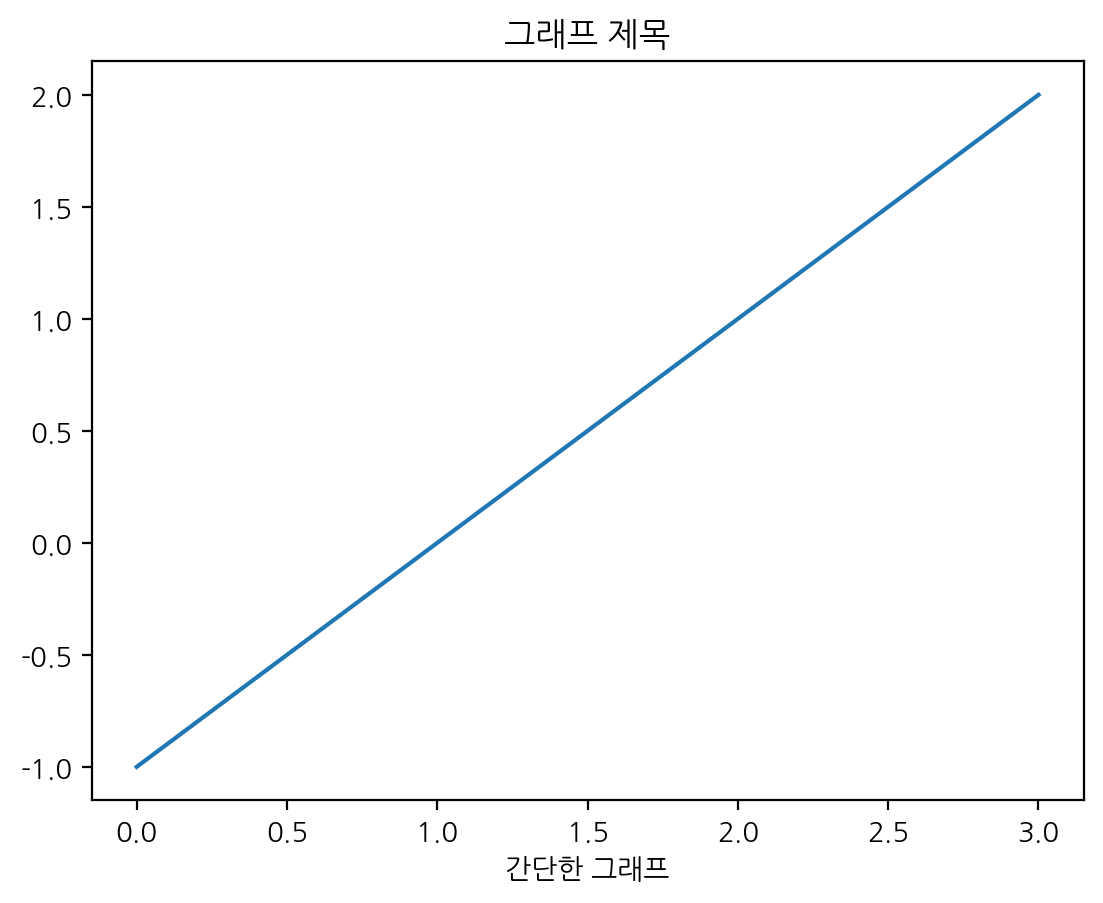

In [4]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-1, 0, 1, 2])
plt.title('그래프 제목')
plt.xlabel('간단한 그래프')
plt.show()

## 데이터분석을 위한 seaborn 내장(토이) 데이터, titanic

In [5]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 타이타닉 열(변수) 설명
- survived : 0 = 사망, 1 = 생존
- pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- sex : male = 남성, female = 여성
- age : 나이
- sibsp : 타이타닉 호에 동승한 자매 / 배우자의 수
- parch : 타이타닉 호에 동승한 부모 / 자식의 수
- fare : 티켓 요금
- embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴
- class : First = 1등석, Second = 2등석, Third = 3등석
- who : 남/여/아이, 'man', 'woman', 'child'
- adult_male : 남자 어른, True/False
- deck : 방 위치, 'A', 'B', 'C', 'D', 'E', 'F', 'G', NaN
- embark_town : 탑승지
- alive : 생존, yes/no
- alone : 1인 탑승, True/False

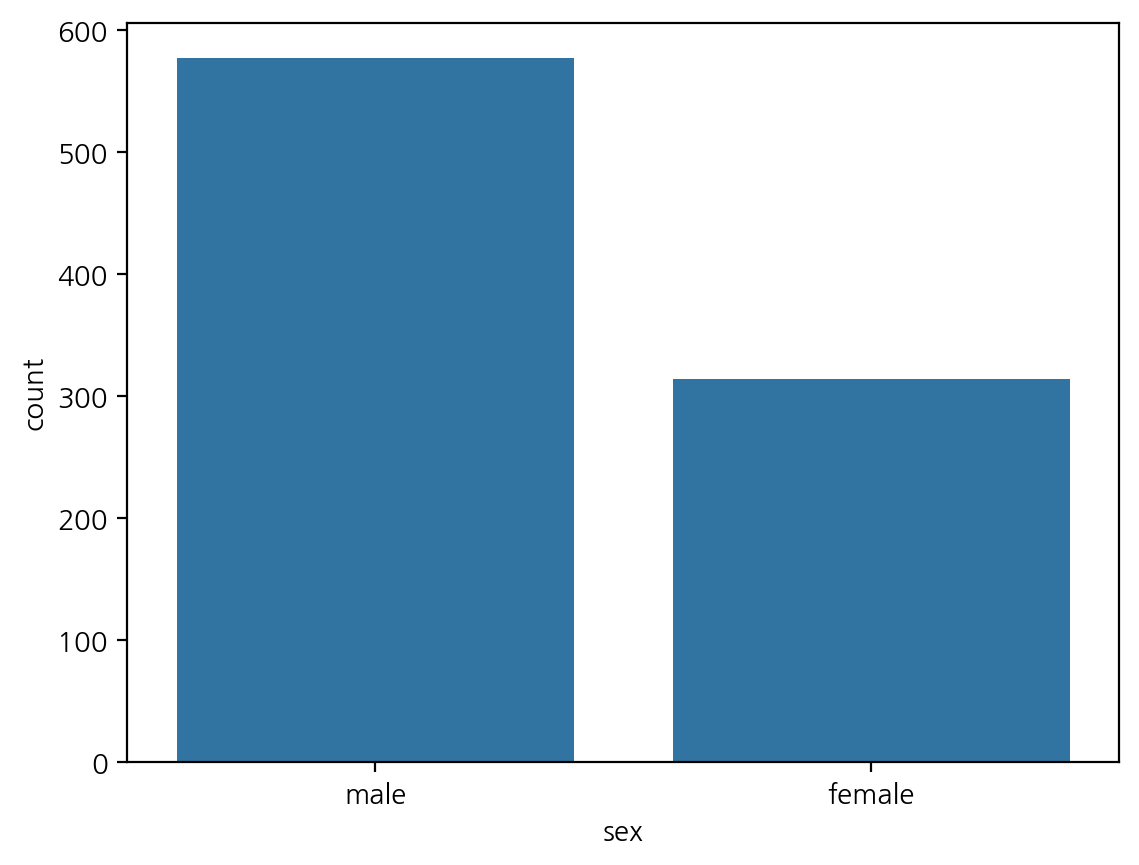

In [8]:
sns.countplot(titanic, x = "sex");

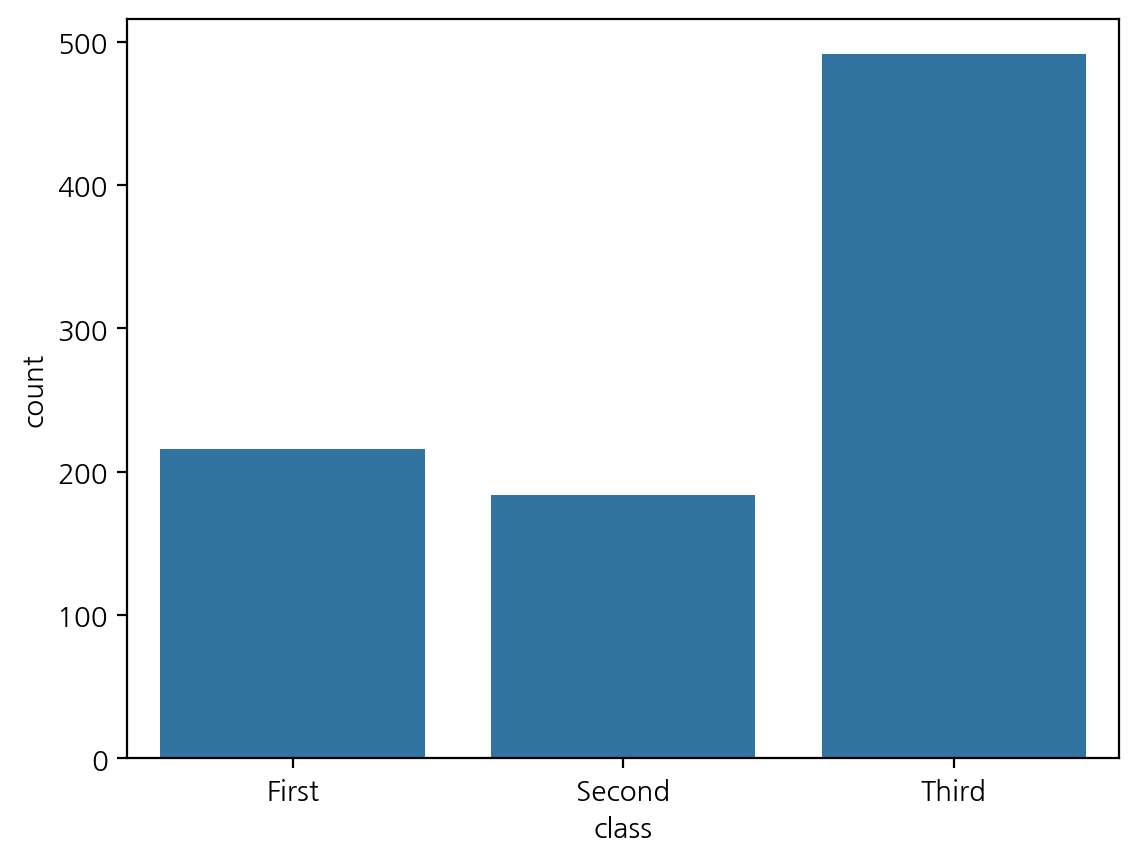

In [9]:
sns.countplot(titanic, x = 'class');

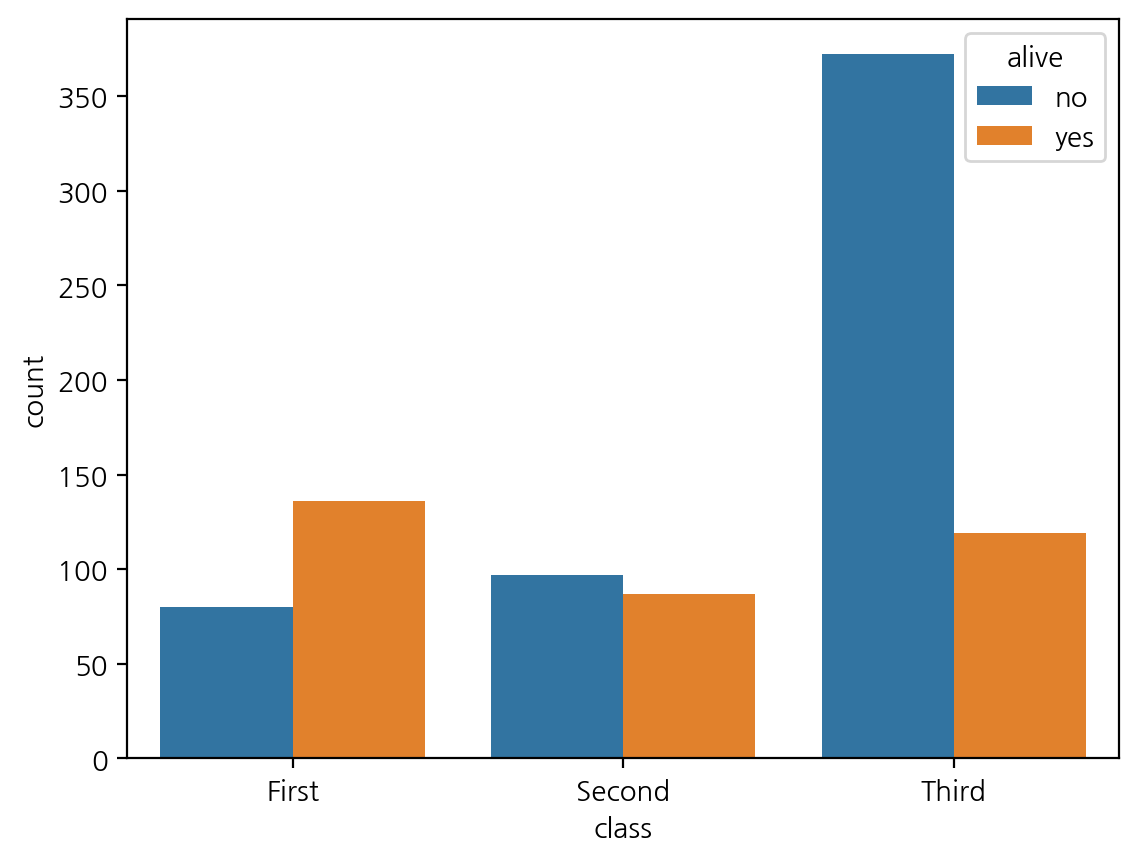

In [10]:
sns.countplot(data = titanic, x = 'class', hue = 'alive');  # x축 class, alive별 색 표현

In [ ]:
titanic.pclass.unique()

In [ ]:
titanic.pclass.values

In [ ]:
titanic["pclass"].unique()

In [ ]:
titanic.pclass.value_counts()

In [ ]:
titanic.nunique()

In [16]:
titanic[['pclass', 'who']].values

array([[3, 'man'],
       [1, 'woman'],
       [3, 'woman'],
       ...,
       [3, 'woman'],
       [1, 'man'],
       [3, 'man']], dtype=object)

In [17]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


In [18]:
titanic.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


In [ ]:
sns.barplot(x="sex", y="survived", data=titanic);

In [ ]:
sns.barplot(x="pclass", y="survived", data=titanic);

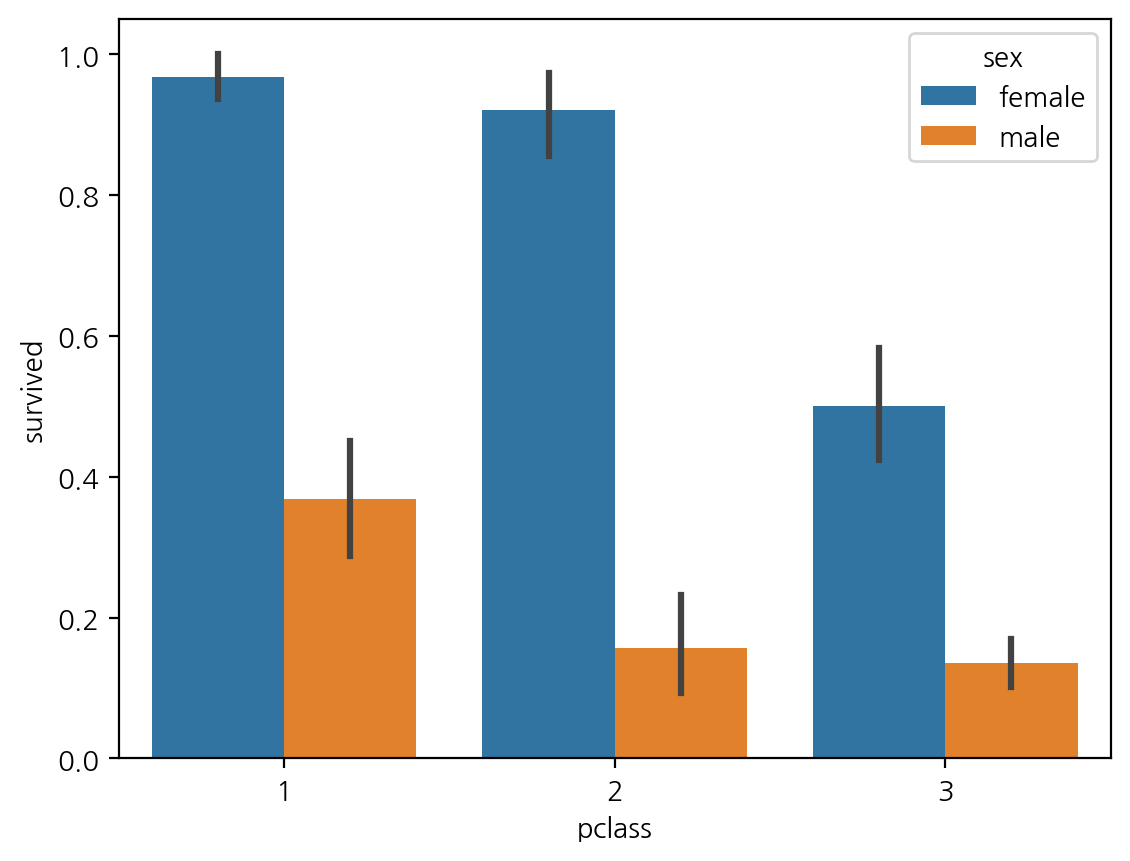

In [22]:
sns.barplot(x="pclass", y="survived", hue="sex", data=titanic);